# Agent initialization

In [1]:
# a lot if unused imports

from pprint import pprint
from Environment.model.utils import *
import pickle
import numpy as np
import matplotlib.pyplot as plt
from Environment.city import _observation
from Agent.agent import Agent

In [2]:
# Enable agent with underlying environment

agent = Agent(map_sample=1, layout_sample=1)

Empty city was built.
Ground was built.
Intersections and roads were built.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Transition dictionary was built.


In [5]:
# The number of states

len(agent.q_table)

6776

In [6]:
whole_zeros = []
any_zeros = []
whole_zero = 0
any_zero = 0
for el in agent.q_table.values():
    if el == [0, 0, 0, 0, 0, 0]:
        whole_zero += 1        
    if 0 in el:
        any_zero += 1
whole_zeros.append(whole_zero)
any_zeros.append(any_zero)
(whole_zero, any_zero)

(6776, 6776)

---

# Learning process

### Initial stage to acquire start knowledge about env.

In [7]:
%%time

agent.learn(20000, alpha=1, gamma=0.9, epsilon=1)
whole_zero = 0
any_zero = 0
for el in agent.q_table.values():
    if el == [0, 0, 0, 0, 0, 0]:
        whole_zero += 1   
    if 0 in el:
        any_zero += 1
whole_zeros.append(whole_zero)
any_zeros.append(any_zero)
print(whole_zero, any_zero)

2834 5461
Wall time: 10.6 s


### Continue learning, considering previous experience...

In [8]:
%%time

agent.learn(30000, alpha=0.7, gamma=0.7, epsilon=0.7)
whole_zero = 0
any_zero = 0
for el in agent.q_table.values():
    if el == [0, 0, 0, 0, 0, 0]:
        whole_zero += 1   
    if 0 in el:
        any_zero += 1
whole_zeros.append(whole_zero)
any_zeros.append(any_zero)
print(whole_zero, any_zero)

2323 4123
Wall time: 16.9 s


In [9]:
%%time

agent.learn(40000, alpha=0.5, gamma=0.8, epsilon=0.6)
whole_zero = 0
any_zero = 0
for el in agent.q_table.values():
    if el == [0, 0, 0, 0, 0, 0]:
        whole_zero += 1   
    if 0 in el:
        any_zero += 1
whole_zeros.append(whole_zero)
any_zeros.append(any_zero)
print(whole_zero, any_zero)

2124 3449
Wall time: 23.1 s


In [10]:
%%time

agent.learn(50000, alpha=0.35, gamma=0.9, epsilon=0.5)
whole_zero = 0
any_zero = 0
for el in agent.q_table.values():
    if el == [0, 0, 0, 0, 0, 0]:
        whole_zero += 1   
    if 0 in el:
        any_zero += 1
whole_zeros.append(whole_zero)
any_zeros.append(any_zero)
print(whole_zero, any_zero)

2044 3164
Wall time: 30.4 s


---

In [11]:
# Change actions for unvisited states as most undesireable

for state in agent.q_table.keys():
    for i in range(len(agent.q_table[state])):
        if agent.q_table[state][i] == 0:
            agent.q_table[state][i] = -1000000

In [14]:
def perform(agent: Agent, n_episodes = 100):
    """
    Test agent's performance on n_episodes different initial states and prints the number of successful and
    absolutely successful trials. 
    """
    c = 0
    next_to_border = 0
    for episode in range(n_episodes):
        agent.state = agent.env.reset()
        print('INITIAL STATE:\n', agent.state)

        is_done = False

        sum_reward = 0

        while not is_done:
            # print(agent.q_table[agent.state])
            if len(set(agent.q_table[agent.state])) == 1:
                action = np.random.randint(0, 6)
            else:
                action = np.argmax(agent.q_table[agent.state])
                
            
            print('action =', action)
            # print(agent.state)

            next_state, reward, is_done = agent.env.step(action)
            
#             print(agent.state)
#             print(next_state)
#             print('-----------------------------------------------------------------\n')
            if next_state.car_coordinates.axis0 == next_state.destination_coordinates.axis0 and \
                next_state.car_coordinates.axis1 == next_state.destination_coordinates.axis1:
                if next_state.current_lane == 0:
                    next_to_border += 1
                c += 1
            
            sum_reward += reward
            agent.state = next_state            
            agent.env.state = next_state

        
        print(f"Episode {episode}: {sum_reward = }\n\n")
    print(f"{c}/{n_episodes} is positive. Where {next_to_border = }")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# Attention! May cause looping
perform(agent, n_episodes=10000)

INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=6)
DestCoord(axis0=7, axis1=7)
self.current_lane = 0
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 4
action = 0
action = 2
action = 3
action = 0
action = 0
action = 4
action = 0
action = 0
Episode 0: sum_reward = 177000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=3, axis1=1)
DestCoord(axis0=3, axis1=1)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 5
Episode 1: sum_reward = 100000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=2, axis1=1)
DestCoord(axis0=2, axis1=7)
self.current_lane = 1
[[      G()           X(0023,5)     R(h[0, 1]|[1, 0]dsb)]
 [      G()        R(v[0, 1, 2]|[2, 1,

action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 3
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
Episode 96: sum_reward = 184500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=3)
DestCoord(axis0=8, axis1=3)
self.current_lane = 1
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 5
Episode 97: sum_reward = 102500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=5)
DestCoord(axis0=2, axis1=7)
self.current_lane = 0
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
Episode 98: sum_reward = 130500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=5, axis1=7)
DestCoord(axis0=8, axis1=4)
self.current_lane = 0
[[      G()      

 self.current_direction = 'W'
CarCoord(axis0=8, axis1=5)
DestCoord(axis0=7, axis1=1)
self.current_lane = 0
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
Episode 183: sum_reward = 147000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=6, axis1=7)
DestCoord(axis0=1, axis1=5)
self.current_lane = 0
[[      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
action = 0
Episode 184: sum_reward = 148500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=1, axis1=5)
DestCoord(axis0=1, axis1=6)
self.current_lane = 2
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 0
Episode 185: sum_reward = 127500


INIT

action = 0
action = 1
action = 4
action = 0
action = 0
action = 0
action = 0
Episode 258: sum_reward = 171000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=5)
DestCoord(axis0=5, axis1=7)
self.current_lane = 0
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 1
action = 0
action = 0
action = 4
Episode 259: sum_reward = 139500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=6)
DestCoord(axis0=3, axis1=1)
self.current_lane = 0
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
Episode 260: sum_reward = 146500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=4, axis1=7)
DestCoord(axis0=1, axis1=3)
self.current_lane = 2
[[      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       

 self.current_direction = 'S'
CarCoord(axis0=3, axis1=1)
DestCoord(axis0=5, axis1=7)
self.current_lane = 2
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 4
Episode 342: sum_reward = 172000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=3)
DestCoord(axis0=8, axis1=3)
self.current_lane = 1
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 5
Episode 343: sum_reward = 102500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=5, axis1=7)
DestCoord(axis0=5, axis1=7)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 5
Episod

action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
Episode 422: sum_reward = 134500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=7, axis1=1)
DestCoord(axis0=1, axis1=3)
self.current_lane = 1
[[R(h[0, 1]|[1, 0]dsb)    X(4020,6)           G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 5
action = 0
action = 0
action = 4
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
Episode 423: sum_reward = 153000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=5)
DestCoord(axis0=6, axis1=1)
self.current_lane = 1
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
Episode 424: sum_reward = 126000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=2, axis1=7)
DestCoord(axis0=3, axis1=1)
se

action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 3
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 505: sum_reward = 171500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=2)
DestCoord(axis0=8, axis1=3)
self.current_lane = 0
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
Episode 506: sum_reward = 134500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=2, axis1=1)
DestCoord(axis0=1, axis1=4)
self.current_lane = 2
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 5
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
Episode 507: sum_reward = 128500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=7, axis1=1)
DestCoord(axis0=6, axis1=7)
self.current_lane =

action = 0
action = 2
action = 0
action = 0
action = 3
action = 4
Episode 589: sum_reward = 178500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=5, axis1=7)
DestCoord(axis0=3, axis1=7)
self.current_lane = 2
[[      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 4
Episode 590: sum_reward = 111000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=4)
DestCoord(axis0=5, axis1=7)
self.current_lane = 0
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 4
Episode 591: sum_reward = 121000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=2, axis1=1)
DestCoord(axis0=7, axis1=1)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 

 self.current_direction = 'N'
CarCoord(axis0=5, axis1=7)
DestCoord(axis0=1, axis1=2)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 0
action = 3
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 678: sum_reward = 152500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=4, axis1=1)
DestCoord(axis0=3, axis1=7)
self.current_lane = 2
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
Episode 679: sum_reward = 166000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=2)
DestCoord(axis0=2, axis1=7)
self.current_lane = 0
[[      G()           X(4020,6)     R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)

action = 1
action = 4
action = 0
action = 0
action = 0
action = 0
Episode 764: sum_reward = 171500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=4, axis1=1)
DestCoord(axis0=7, axis1=1)
self.current_lane = 2
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
Episode 765: sum_reward = 136500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=2, axis1=1)
DestCoord(axis0=8, axis1=5)
self.current_lane = 2
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 3
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 4
Episode 766: sum_reward = 157000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=6)
DestCoord(axis0=8, axis1=4)
self.current_lane = 0
[[R(v[0, 1, 2, 3]|[1, 0]dsb)    X(2200,4)    

 self.current_direction = 'W'
CarCoord(axis0=8, axis1=4)
DestCoord(axis0=8, axis1=5)
self.current_lane = 0
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 5
action = 0
Episode 847: sum_reward = 104500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=5, axis1=1)
DestCoord(axis0=1, axis1=6)
self.current_lane = 3
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 3
action = 0
action = 1
action = 4
Episode 848: sum_reward = 172500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=4, axis1=7)
DestCoord(axis0=5, axis1=7)
self.current_lane = 2
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G() 

action = 0
action = 0
action = 0
action = 4
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 4
Episode 928: sum_reward = 167000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=2)
DestCoord(axis0=8, axis1=4)
self.current_lane = 1
[[R(v[0, 1, 2]|[2, 1, 0]dsb)    X(0023,5)           G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 4
Episode 929: sum_reward = 158500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=4, axis1=1)
DestCoord(axis0=7, axis1=1)
self.current_lane = 1
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 4
Episode 930: sum_reward = 138500


INITIAL STATE:
 self.current_direction = 'W'
CarCoor

 self.current_direction = 'E'
CarCoord(axis0=8, axis1=5)
DestCoord(axis0=8, axis1=4)
self.current_lane = 1
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 5
action = 4
Episode 1005: sum_reward = 106500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=6, axis1=7)
DestCoord(axis0=8, axis1=4)
self.current_lane = 0
[[      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]]
action = 3
action = 0
action = 2
action = 0
action = 0
action = 0
Episode 1006: sum_reward = 139500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=6, axis1=1)
DestCoord(axis0=1, axis1=5)
self.current_lane = 3
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 5
action = 4
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action =

action = 0
action = 0
Episode 1089: sum_reward = 176500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=4, axis1=7)
DestCoord(axis0=6, axis1=7)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
Episode 1090: sum_reward = 109000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=3, axis1=7)
DestCoord(axis0=1, axis1=6)
self.current_lane = 2
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 1
action = 4
Episode 1091: sum_reward = 130500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=5)
DestCoord(axis0=5, axis1=7)
self.current_lane = 1
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 1
ac

INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=6, axis1=7)
DestCoord(axis0=7, axis1=1)
self.current_lane = 0
[[      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 4
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 1172: sum_reward = 178500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=2, axis1=7)
DestCoord(axis0=1, axis1=5)
self.current_lane = 1
[[R(h[0, 1]|[2, 1, 0]dsb)    X(0203,5)           G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 1
action = 4
action = 0
Episode 1173: sum_reward = 130500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=3, axis1=1)
DestCoord(axis0=2, axis1=1)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G(

action = 0
action = 3
action = 4
Episode 1253: sum_reward = 168500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=3, axis1=7)
DestCoord(axis0=2, axis1=7)
self.current_lane = 2
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
Episode 1254: sum_reward = 127500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=6, axis1=1)
DestCoord(axis0=8, axis1=6)
self.current_lane = 0
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 1
action = 4
action = 0
action = 0
action = 0
action = 0
Episode 1255: sum_reward = 148500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=5, axis1=1)
DestCoord(axis0=5, axis1=7)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G(

action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 1325: sum_reward = 175500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=3, axis1=7)
DestCoord(axis0=5, axis1=7)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
Episode 1326: sum_reward = 139000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=7, axis1=1)
DestCoord(axis0=4, axis1=1)
self.current_lane = 0
[[R(h[0, 1]|[1, 0]dsb)    X(4020,6)           G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 4
action = 0
Episode 1327: sum_reward = 108500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=2)
DestCoord(axis0=8, axis1=5)
self.current_lane = 1
[[      G()           X(4020,6)     R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)]
 [      G()        R(h[0, 1]|[1, 0]dsb)     

 self.current_direction = 'W'
CarCoord(axis0=8, axis1=6)
DestCoord(axis0=3, axis1=1)
self.current_lane = 0
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 1414: sum_reward = 169500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=5, axis1=7)
DestCoord(axis0=3, axis1=7)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 0
action = 4
Episode 1415: sum_reward = 134000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=5, axis1=1)
DestCoord(axis0=6, axis1=7)
self.current_lane = 2
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
act

 self.current_direction = 'W'
CarCoord(axis0=1, axis1=6)
DestCoord(axis0=8, axis1=6)
self.current_lane = 0
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 4
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
action = 0
action = 0
action = 0
action = 0
Episode 1491: sum_reward = 180500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=3, axis1=1)
DestCoord(axis0=8, axis1=6)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 3
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
Episode 1492: sum_reward = 178000


INITIAL STATE:
 self.current_

action = 0
Episode 1571: sum_reward = 149000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=4, axis1=1)
DestCoord(axis0=8, axis1=4)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 4
Episode 1572: sum_reward = 125500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=6)
DestCoord(axis0=1, axis1=4)
self.current_lane = 1
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 4
Episode 1573: sum_reward = 134000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=4)
DestCoord(axis0=8, axis1=4)
self.current_lane = 1
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 0



INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=4)
DestCoord(axis0=8, axis1=3)
self.current_lane = 1
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 1
action = 4
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
action = 0
Episode 1646: sum_reward = 158000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=4)
DestCoord(axis0=8, axis1=4)
self.current_lane = 2
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 5
Episode 1647: sum_reward = 102500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=3)
DestCoord(axis0=7, axis1=1)
self.current_lane = 1
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 4
action = 0
action = 1
act

action = 0
action = 4
action = 0
action = 0
action = 0
action = 1
action = 4
Episode 1719: sum_reward = 158000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=4)
DestCoord(axis0=1, axis1=4)
self.current_lane = 0
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 2
action = 3
action = 0
action = 0
action = 3
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
Episode 1720: sum_reward = 165000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=3)
DestCoord(axis0=1, axis1=3)
self.current_lane = 0
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 5
Episode 1721: sum_reward = 100000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=3, axis1=7)
DestCoord(axis0=1, axis1=5)
self.current_lane = 2
[[      G()        R(v[0, 1, 2]|[2, 

action = 0
action = 0
action = 0
Episode 1800: sum_reward = 170000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=5, axis1=1)
DestCoord(axis0=8, axis1=2)
self.current_lane = 3
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 1
action = 4
Episode 1801: sum_reward = 135000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=3)
DestCoord(axis0=4, axis1=7)
self.current_lane = 0
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
Episode 1802: sum_reward = 165000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=5)
DestCoord(axis0=8, axis1=2)
self.current_lane = 2
[[      G()        R(h[0, 1]|[2, 1, 0

action = 1
action = 4
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
action = 0
Episode 1869: sum_reward = 167000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=4)
DestCoord(axis0=5, axis1=1)
self.current_lane = 0
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 3
action = 0
action = 0
action = 5
action = 2
action = 0
action = 0
action = 0
action = 0
Episode 1870: sum_reward = 141500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=6)
DestCoord(axis0=1, axis1=2)
self.current_lane = 0
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 3
action = 3
action = 0
action = 0
action = 0
action = 2
action = 0
Episode 1871: sum_reward = 165000


INITIAL STATE:
 self

 self.current_direction = 'S'
CarCoord(axis0=3, axis1=7)
DestCoord(axis0=5, axis1=1)
self.current_lane = 2
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 3
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
Episode 1952: sum_reward = 172000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=2, axis1=1)
DestCoord(axis0=8, axis1=5)
self.current_lane = 1
[[      G()           X(0023,5)     R(h[0, 1]|[1, 0]dsb)]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 3
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 4
Episode 1953: sum_reward = 157000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=4, axis1=1)
DestCoord(axis0=8, axis1=4)
self.current_lane

 self.current_direction = 'E'
CarCoord(axis0=8, axis1=4)
DestCoord(axis0=1, axis1=4)
self.current_lane = 2
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 3
action = 0
action = 1
action = 0
action = 0
action = 4
Episode 2036: sum_reward = 162500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=6)
DestCoord(axis0=4, axis1=1)
self.current_lane = 0
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 3
action = 4
Episode 2037: sum_reward = 155000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=1, axis1=2)
DestCoord(axis0=1, axis1=3)
self.current_lane = 0
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       

action = 0
action = 3
action = 4
Episode 2114: sum_reward = 150000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=4, axis1=1)
DestCoord(axis0=8, axis1=2)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 5
action = 4
action = 0
action = 0
action = 0
action = 1
action = 4
Episode 2115: sum_reward = 111500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=7, axis1=1)
DestCoord(axis0=1, axis1=5)
self.current_lane = 0
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
Episode 2116: sum_reward = 169500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=3)
DestCoord(axis0=1, axis1=2)
self.current_lane = 1
[[      G()        R(h[0,

action = 0
action = 0
Episode 2190: sum_reward = 108500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=5, axis1=1)
DestCoord(axis0=8, axis1=4)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 4
Episode 2191: sum_reward = 130000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=6, axis1=7)
DestCoord(axis0=8, axis1=5)
self.current_lane = 1
[[      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 2
action = 0
action = 0
Episode 2192: sum_reward = 119500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=3)
DestCoord(axis0=8, axis1=2)
self.current_lane = 1
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [ 

action = 0
action = 0
action = 2
action = 0
Episode 2269: sum_reward = 144500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=7, axis1=1)
DestCoord(axis0=6, axis1=7)
self.current_lane = 1
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 0
action = 4
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 4
Episode 2270: sum_reward = 189500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=2, axis1=1)
DestCoord(axis0=5, axis1=7)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action 

 self.current_direction = 'S'
CarCoord(axis0=6, axis1=1)
DestCoord(axis0=7, axis1=7)
self.current_lane = 2
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
Episode 2363: sum_reward = 149500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=3, axis1=1)
DestCoord(axis0=7, axis1=1)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 3
action = 0
action = 4
Episode 2364: sum_reward = 138000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=2, axis1=1)
DestCoord(axis0=3, axis1=1)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 4
Ep

action = 0
action = 1
action = 0
action = 0
action = 4
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 2435: sum_reward = 178500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=2, axis1=7)
DestCoord(axis0=8, axis1=3)
self.current_lane = 2
[[R(h[0, 1]|[2, 1, 0]dsb)    X(0203,5)           G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
Episode 2436: sum_reward = 169500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=5)
DestCoord(axis0=1, axis1=2)
self.current_lane = 1
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 4
Episode 2437: sum_reward = 138500


INITIAL STATE:
 self.current_direction = 'N'
Ca

action = 5
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
Episode 2521: sum_reward = 130500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=6)
DestCoord(axis0=7, axis1=7)
self.current_lane = 1
[[R(v[0, 1, 2, 3]|[1, 0]dsb)    X(2200,4)           G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 1
action = 4
Episode 2522: sum_reward = 126000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=3)
DestCoord(axis0=7, axis1=1)
self.current_lane = 0
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 2523: sum_reward = 151000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=3)
DestCoord(axis0=7, axis1=7)
self.current_lane = 1
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()

action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
Episode 2601: sum_reward = 165500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=4)
DestCoord(axis0=1, axis1=3)
self.current_lane = 1
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 4
Episode 2602: sum_reward = 129500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=6, axis1=7)
DestCoord(axis0=8, axis1=4)
self.current_lane = 0
[[      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 0
action = 5
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
Episode 2603: sum_reward = 130500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=6, axis1=7)
DestCoord(axis0=7, axis1=7)
self.current_lane = 3
[[

 self.current_direction = 'E'
CarCoord(axis0=1, axis1=5)
DestCoord(axis0=1, axis1=5)
self.current_lane = 1
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 5
Episode 2682: sum_reward = 100000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=4, axis1=7)
DestCoord(axis0=4, axis1=1)
self.current_lane = 2
[[      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 3
action = 4
Episode 2683: sum_reward = 169500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=5)
DestCoord(axis0=3, axis1=7)
self.current_lane = 1
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
acti

 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 4
action = 0
action = 0
action = 1
action = 0
action = 0
Episode 2773: sum_reward = 183000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=7, axis1=1)
DestCoord(axis0=1, axis1=3)
self.current_lane = 0
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
Episode 2774: sum_reward = 160500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=5, axis1=1)
DestCoord(axis0=1, axis1=5)
self.current_lane = 1
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)     

 self.current_direction = 'N'
CarCoord(axis0=3, axis1=7)
DestCoord(axis0=6, axis1=1)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
action = 4
action = 0
action = 0
action = 0
Episode 2851: sum_reward = 162500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=6)
DestCoord(axis0=3, axis1=1)
self.current_lane = 0
[[R(v[0, 1, 2, 3]|[1, 0]dsb)    X(2200,4)           G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 4
action = 0
action = 0
action = 1
action = 0
action = 0
Episode 2852: sum_reward = 166000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=4, axis1=7

 self.current_direction = 'S'
CarCoord(axis0=5, axis1=7)
DestCoord(axis0=3, axis1=1)
self.current_lane = 3
[[      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 4
action = 0
action = 0
action = 1
action = 0
action = 0
Episode 2946: sum_reward = 174000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=4)
DestCoord(axis0=1, axis1=6)
self.current_lane = 1
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 3
action = 0
action = 1
action = 4
Episode 2947: sum_reward = 153500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=6)
D

 self.current_direction = 'S'
CarCoord(axis0=3, axis1=7)
DestCoord(axis0=1, axis1=3)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 5
action = 4
action = 0
action = 1
action = 0
action = 0
action = 0
action = 4
Episode 3020: sum_reward = 116000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=5)
DestCoord(axis0=2, axis1=7)
self.current_lane = 0
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 3021: sum_reward = 148000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=2, axis1=7)
DestCoord(axis0=8, axis1=4)
self.current_lane = 1
[[R(h[0, 1]|[2, 1, 0]dsb)    X(0203,5)           G()       ]
 [      G()        R(v

 self.current_direction = 'N'
CarCoord(axis0=6, axis1=7)
DestCoord(axis0=7, axis1=7)
self.current_lane = 1
[[      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 5
action = 0
Episode 3100: sum_reward = 107000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=6)
DestCoord(axis0=7, axis1=1)
self.current_lane = 0
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 3
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
Episode 3101: sum_reward = 144000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=3)
DestCoord(axis0=6, axis1=7)
self.current_lane = 1
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0

action = 1
action = 0
action = 0
action = 0
Episode 3184: sum_reward = 155500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=7, axis1=1)
DestCoord(axis0=8, axis1=3)
self.current_lane = 1
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 3
action = 5
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
action = 0
Episode 3185: sum_reward = 132000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=4, axis1=7)
DestCoord(axis0=1, axis1=4)
self.current_lane = 1
[[      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 4
Episode 3186: sum_reward = 121000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=2, axis1=1)
DestCoord(axis0=8, axis1=5)
self.current_lane = 1
[[ 

 self.current_direction = 'S'
CarCoord(axis0=7, axis1=1)
DestCoord(axis0=1, axis1=5)
self.current_lane = 3
[[R(h[0, 1]|[1, 0]dsb)    X(4020,6)           G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 5
action = 4
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
Episode 3263: sum_reward = 141500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=6)
DestCoord(axis0=8, axis1=3)
self.current_lane = 1
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
action = 0
Episode 3264: sum_reward = 167000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=3)
DestCoord(axis0=3, axis1=7)
self.current_lane = 0
[[      G()      

 self.current_direction = 'N'
CarCoord(axis0=5, axis1=7)
DestCoord(axis0=6, axis1=1)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 3
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
action = 4
action = 0
action = 0
action = 0
Episode 3352: sum_reward = 166500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=1, axis1=6)
DestCoord(axis0=8, axis1=3)
self.current_lane = 1
[[      G()           X(0203,5)     R(v[0, 1, 2]|[2, 1, 0]dsb)]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
Episode 3353: sum_reward = 170500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=4, axis1=1)
DestCoord(axis0=1, axis1=6)
sel

action = 2
action = 0
action = 0
action = 0
action = 0
Episode 3425: sum_reward = 149000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=6, axis1=1)
DestCoord(axis0=5, axis1=1)
self.current_lane = 3
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
Episode 3426: sum_reward = 107000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=2, axis1=1)
DestCoord(axis0=1, axis1=6)
self.current_lane = 1
[[      G()           X(0023,5)     R(h[0, 1]|[1, 0]dsb)]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 3427: sum_reward = 149000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=4, axis1=1)
DestCoord(axis0=7, axis1=1)
self.current_lane = 2
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1,

action = 0
action = 5
action = 2
action = 0
action = 0
action = 0
action = 0
Episode 3509: sum_reward = 161000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=2)
DestCoord(axis0=4, axis1=1)
self.current_lane = 0
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 3
action = 4
Episode 3510: sum_reward = 173000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=6)
DestCoord(axis0=3, axis1=7)
self.current_lane = 2
[[R(v[0, 1, 2, 3]|[1, 0]dsb)    X(2200,4)           G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 2
action = 5
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 3511: sum_reward = 135000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord

 self.current_direction = 'N'
CarCoord(axis0=4, axis1=7)
DestCoord(axis0=3, axis1=7)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
Episode 3588: sum_reward = 134500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=7, axis1=7)
DestCoord(axis0=5, axis1=7)
self.current_lane = 0
[[      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
Episode 3589: sum_reward = 139000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=5, axis1=1)
DestCoord(axis0=7, axis1=7)
self.current_lane = 3
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
Episode 3590:

action = 0
Episode 3669: sum_reward = 111500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=3)
DestCoord(axis0=1, axis1=6)
self.current_lane = 0
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 3
action = 0
action = 1
action = 4
Episode 3670: sum_reward = 158000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=4)
DestCoord(axis0=8, axis1=3)
self.current_lane = 0
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 1
action = 4
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
action = 0
Episode 3671: sum_reward = 158000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=3, axis1=7)
DestCoord(axis0=5

action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 3750: sum_reward = 178000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=4, axis1=7)
DestCoord(axis0=5, axis1=7)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
Episode 3751: sum_reward = 104500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=4, axis1=7)
DestCoord(axis0=7, axis1=1)
self.current_lane = 1
[[      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 2
action = 3
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
Episode 3752: sum_reward = 158500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=7, axis1=7)
DestCoord(axis0=1, axis1=5)
self.current_lane = 1
[[      G()    

 self.current_direction = 'W'
CarCoord(axis0=8, axis1=3)
DestCoord(axis0=8, axis1=6)
self.current_lane = 1
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 4
Episode 3825: sum_reward = 118000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=4, axis1=1)
DestCoord(axis0=7, axis1=7)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
Episode 3826: sum_reward = 176500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=1, axis1=4)
DestCoord(axis0=5, axis1=1)
self.current_lane = 1
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [    

 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 5
Episode 3902: sum_reward = 100000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=3, axis1=1)
DestCoord(axis0=2, axis1=7)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 3903: sum_reward = 185500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=5)
DestCoord(axis0=4, axis1=7)
self.current_lane = 1
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
Episode 3904: sum_reward = 124000


INITIAL STATE:
 self.current_directio


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=1, axis1=3)
DestCoord(axis0=1, axis1=4)
self.current_lane = 0
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
Episode 3981: sum_reward = 134500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=3, axis1=1)
DestCoord(axis0=6, axis1=1)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
Episode 3982: sum_reward = 143500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=2, axis1=7)
DestCoord(axis0=1, axis1=6)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 1
action = 4
Episode 3983: sum_reward = 103000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0

action = 0
action = 0
action = 0
action = 3
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
action = 4
action = 0
action = 0
action = 0
Episode 4062: sum_reward = 175500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=1, axis1=2)
DestCoord(axis0=7, axis1=7)
self.current_lane = 0
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 3
action = 0
action = 0
action = 4
action = 0
action = 0
Episode 4063: sum_reward = 164000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=5)
DestCoord(axis0=4, axis1=1)
self.current_lane = 1
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 4
action = 0
action = 2
action = 0
action = 0
action = 3
action = 4
Episode 4064: s

 [      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]]
action = 5
action = 4
Episode 4142: sum_reward = 106500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=1, axis1=3)
DestCoord(axis0=8, axis1=2)
self.current_lane = 0
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 3
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 4143: sum_reward = 183500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=2, axis1=7)
DestCoord(axis0=3, axis1=1)
self.current_lane = 1
[[R(h[0, 1]|[2, 1, 0]dsb)    X(0203,5)           G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 1
action = 0
action = 0
action = 0
action = 4
action = 0
action = 0
action = 1
action = 0
action = 0
Episode 4144: sum_reward = 14250

 self.current_direction = 'E'
CarCoord(axis0=8, axis1=6)
DestCoord(axis0=1, axis1=5)
self.current_lane = 2
[[R(v[0, 1, 2, 3]|[1, 0]dsb)    X(2200,4)           G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 1
action = 0
action = 0
action = 0
action = 4
action = 0
action = 0
action = 0
action = 1
action = 4
action = 0
Episode 4221: sum_reward = 149000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=2)
DestCoord(axis0=6, axis1=7)
self.current_lane = 1
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 4
Episode 4222: sum_reward = 148500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=4)
DestCoord(axis0=1, axis1=6)
self.current_lane = 2
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G() 

action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 4294: sum_reward = 183000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=5, axis1=1)
DestCoord(axis0=8, axis1=4)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 4
Episode 4295: sum_reward = 148000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=4, axis1=7)
DestCoord(axis0=2, axis1=1)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
Episode 4296: sum_reward = 152000



 self.current_direction = 'W'
CarCoord(axis0=1, axis1=5)
DestCoord(axis0=6, axis1=1)
self.current_lane = 1
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
action = 4
action = 0
action = 0
action = 0
Episode 4372: sum_reward = 152500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=4)
DestCoord(axis0=8, axis1=5)
self.current_lane = 0
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 3
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 4
Episode 4373: sum_reward = 167000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=5)
DestCoord(axis0=4, axis1=1)
self.current_lane = 1
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)      

 self.current_direction = 'S'
CarCoord(axis0=6, axis1=7)
DestCoord(axis0=5, axis1=7)
self.current_lane = 3
[[      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]]
action = 5
action = 4
Episode 4456: sum_reward = 109000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=4)
DestCoord(axis0=4, axis1=1)
self.current_lane = 1
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 4
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
Episode 4457: sum_reward = 137000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=6, axis1=1)
DestCoord(axis0=1, axis1=4)
self.current_lane = 1
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0


 [      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]]
action = 5
Episode 4543: sum_reward = 100000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=1, axis1=5)
DestCoord(axis0=4, axis1=7)
self.current_lane = 2
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
Episode 4544: sum_reward = 144500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=5)
DestCoord(axis0=1, axis1=3)
self.current_lane = 1
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 4
Episode 4545: sum_reward = 167500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=5, axis1=7)
DestCoord(axis0=8, axis

action = 0
action = 5
action = 0
action = 0
action = 1
action = 0
action = 0
action = 4
Episode 4619: sum_reward = 121000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=5, axis1=7)
DestCoord(axis0=1, axis1=4)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 4
Episode 4620: sum_reward = 148500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=2)
DestCoord(axis0=3, axis1=7)
self.current_lane = 0
[[      G()           X(4020,6)     R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
action = 0
action = 0
action = 0
action = 0
Episode 4621: sum_reward = 162000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=

 self.current_direction = 'W'
CarCoord(axis0=1, axis1=4)
DestCoord(axis0=6, axis1=1)
self.current_lane = 1
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 1
action = 4
action = 4
action = 0
action = 0
action = 0
Episode 4699: sum_reward = 148000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=3, axis1=1)
DestCoord(axis0=1, axis1=5)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
Episode 4700: sum_reward = 185000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=7, axis1=7)
DestCoord(axis0=1, axis1=5)
self.current_lane = 0
[[      G()        R(v[0, 1, 2,

action = 0
action = 0
action = 2
action = 0
action = 0
Episode 4786: sum_reward = 153000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=1, axis1=3)
DestCoord(axis0=4, axis1=7)
self.current_lane = 1
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
Episode 4787: sum_reward = 153500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=7, axis1=1)
DestCoord(axis0=3, axis1=1)
self.current_lane = 3
[[R(h[0, 1]|[1, 0]dsb)    X(4020,6)           G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 5
action = 4
action = 0
action = 0
action = 0
Episode 4788: sum_reward = 115500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=1, axis1=2)
DestCoord(axis0=3, axis1=1)
self.current_lane = 1
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(

 self.current_direction = 'S'
CarCoord(axis0=5, axis1=1)
DestCoord(axis0=8, axis1=2)
self.current_lane = 3
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 1
action = 4
Episode 4876: sum_reward = 135000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=4, axis1=1)
DestCoord(axis0=8, axis1=3)
self.current_lane = 0
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
action = 0
Episode 4877: sum_reward = 144000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=6)
DestCoord(axis0=5, axis1=1)
self.current_lane = 2
[[R(v[0, 1, 2, 3]|[1, 0]dsb)    X(2200,4)           G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 0

action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
Episode 4957: sum_reward = 163000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=4)
DestCoord(axis0=1, axis1=3)
self.current_lane = 1
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 4
Episode 4958: sum_reward = 172000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=4, axis1=7)
DestCoord(axis0=2, axis1=7)
self.current_lane = 2
[[      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
Episode 4959: sum_reward = 111500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=1, axis1=3)
DestCoord(axis0=1, axis1=6)
self.current_lane = 1

 self.current_direction = 'S'
CarCoord(axis0=7, axis1=7)
DestCoord(axis0=5, axis1=7)
self.current_lane = 0
[[      G()           X(2200,4)     R(h[0, 1, 2]|[1, 0]dsb)]
 [      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 4
Episode 5041: sum_reward = 111000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=5, axis1=1)
DestCoord(axis0=8, axis1=5)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 3
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 4
Episode 5042: sum_reward = 170500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=2)
DestCoord(axis0=1, axis1=5)
self.current_lane = 0
[[R(v[0, 1, 2]|[2, 1, 0]dsb)    X(0023,5)           G()       ]
 [      G()        R(h[0, 1]|[1,

action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 5122: sum_reward = 153000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=2)
DestCoord(axis0=4, axis1=1)
self.current_lane = 1
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 3
action = 4
Episode 5123: sum_reward = 173000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=7, axis1=7)
DestCoord(axis0=6, axis1=1)
self.current_lane = 1
[[      G()           X(2200,4)     R(h[0, 1, 2]|[1, 0]dsb)]
 [      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
action = 3
action = 0
action = 2
action = 0
action = 0
Episode 5124: sum_reward = 149500


INITIAL STATE:
 self

 self.current_direction = 'S'
CarCoord(axis0=3, axis1=7)
DestCoord(axis0=5, axis1=7)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
Episode 5195: sum_reward = 139000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=6, axis1=7)
DestCoord(axis0=4, axis1=1)
self.current_lane = 3
[[      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 3
action = 4
Episode 5196: sum_reward = 160500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=1, axis1=3)
DestCoord(axis0=8, axis1=2)
self.current_lane = 0
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
a

action = 1
action = 0
action = 0
action = 0
action = 4
action = 0
action = 0
action = 0
action = 1
action = 4
Episode 5276: sum_reward = 153500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=3, axis1=1)
DestCoord(axis0=4, axis1=7)
self.current_lane = 2
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 5
action = 0
action = 0
action = 4
action = 0
action = 0
action = 0
action = 0
action = 2
action = 3
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
Episode 5277: sum_reward = 189500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=5, axis1=7)
DestCoord(axis0=1, axis1=4)
self.current_lane = 0
[[      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 3
action =

action = 0
Episode 5361: sum_reward = 191000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=5)
DestCoord(axis0=5, axis1=7)
self.current_lane = 1
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 1
action = 0
action = 0
action = 4
Episode 5362: sum_reward = 119000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=5, axis1=7)
DestCoord(axis0=7, axis1=1)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 4
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 5363: sum_reward = 174000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=1, axis1=3)
DestCoord(axis0=6, axis1=7)
self.curre

 self.current_direction = 'W'
CarCoord(axis0=1, axis1=3)
DestCoord(axis0=3, axis1=7)
self.current_lane = 0
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
Episode 5448: sum_reward = 126000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=3)
DestCoord(axis0=6, axis1=7)
self.current_lane = 0
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 5449: sum_reward = 148500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=2)
DestCoord(axis0=8, axis1=2)
self.current_lane = 1
[[R(v[0, 1, 2]|[2, 1, 0]dsb)    X(0023,5)           G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G(

 self.current_direction = 'S'
CarCoord(axis0=6, axis1=7)
DestCoord(axis0=8, axis1=5)
self.current_lane = 0
[[      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]]
action = 3
action = 0
action = 2
action = 0
action = 0
Episode 5526: sum_reward = 135000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=5)
DestCoord(axis0=4, axis1=1)
self.current_lane = 0
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 3
action = 4
Episode 5527: sum_reward = 150500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=4)
DestCoord(axis0=3, axis1=7)
self.current_lane = 0
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 5
action = 0
action = 0
action 

action = 0
action = 0
action = 3
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 5609: sum_reward = 171500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=5, axis1=7)
DestCoord(axis0=4, axis1=1)
self.current_lane = 1
[[      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 3
action = 4
Episode 5610: sum_reward = 165000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=6, axis1=7)
DestCoord(axis0=2, axis1=1)
self.current_lane = 0
[[      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 3
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action =

 self.current_direction = 'N'
CarCoord(axis0=4, axis1=7)
DestCoord(axis0=7, axis1=7)
self.current_lane = 2
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 0
Episode 5690: sum_reward = 116000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=4)
DestCoord(axis0=7, axis1=7)
self.current_lane = 1
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 5
action = 4
action = 0
action = 0
action = 1
action = 4
Episode 5691: sum_reward = 109500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=2)
DestCoord(axis0=1, axis1=3)
self.current_lane = 0
[[      G()           X(4020,6)     R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 2
action = 3
action = 0
action = 4
action = 0
action = 0
action = 0
a

action = 4
action = 0
Episode 5775: sum_reward = 143500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=7, axis1=1)
DestCoord(axis0=6, axis1=7)
self.current_lane = 0
[[R(h[0, 1]|[1, 0]dsb)    X(4020,6)           G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 4
Episode 5776: sum_reward = 149500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=4, axis1=7)
DestCoord(axis0=2, axis1=1)
self.current_lane = 2
[[      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
Episode 5777: sum_reward = 179000


INITIAL STATE:
 

 self.current_direction = 'N'
CarCoord(axis0=6, axis1=7)
DestCoord(axis0=8, axis1=3)
self.current_lane = 0
[[      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
Episode 5859: sum_reward = 126000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=1, axis1=5)
DestCoord(axis0=7, axis1=7)
self.current_lane = 1
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 4
action = 0
action = 2
action = 3
action = 0
action = 0
action = 4
action = 0
action = 0
Episode 5860: sum_reward = 145500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=1, axis1=4)
DestCoord(axis0=8, axis1=2)
self.current_lane = 0
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 0
acti

action = 3
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
Episode 5941: sum_reward = 154000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=3, axis1=7)
DestCoord(axis0=8, axis1=6)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 5
action = 0
action = 0
action = 3
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
Episode 5942: sum_reward = 153000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=4)
DestCoord(axis0=1, axis1=4)
self.current_lane = 0
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 3
action = 0
action = 1
action = 0
action = 0
action = 4
Episode 5943: sum_reward = 162500




action = 0
Episode 6028: sum_reward = 133000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=5, axis1=7)
DestCoord(axis0=7, axis1=7)
self.current_lane = 3
[[      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
Episode 6029: sum_reward = 132000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=3)
DestCoord(axis0=5, axis1=1)
self.current_lane = 0
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
Episode 6030: sum_reward = 121500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=3, axis1=1)
DestCoord(axis0=1, axis1=6)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 2
actio

action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 4
Episode 6107: sum_reward = 167500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=6, axis1=1)
DestCoord(axis0=8, axis1=3)
self.current_lane = 3
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 4
action = 0
action = 1
action = 4
action = 0
Episode 6108: sum_reward = 130000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=3)
DestCoord(axis0=3, axis1=7)
self.current_lane = 0
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
action = 0
action = 0
action = 0
action = 0
Episode 6109: sum_reward = 157500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=5)
DestCoord(axis0=8, axis1=2)
self.current_lane = 0
[

 self.current_direction = 'W'
CarCoord(axis0=1, axis1=6)
DestCoord(axis0=5, axis1=1)
self.current_lane = 0
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 3
action = 0
action = 0
action = 0
action = 0
action = 5
action = 2
action = 0
action = 0
action = 0
action = 0
Episode 6185: sum_reward = 150500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=7, axis1=1)
DestCoord(axis0=8, axis1=2)
self.current_lane = 2
[[R(h[0, 1]|[1, 0]dsb)    X(4020,6)           G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 2
action = 5
action = 4
Episode 6186: sum_reward = 110000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=4)
DestCoord(axis0=8, axis1=4)
self.current_lane = 0
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 3
action = 0
action 

action = 0
action = 0
action = 3
action = 0
action = 1
action = 4
Episode 6269: sum_reward = 171500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=2, axis1=7)
DestCoord(axis0=3, axis1=7)
self.current_lane = 0
[[R(h[0, 1]|[2, 1, 0]dsb)    X(0203,5)           G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
Episode 6270: sum_reward = 104500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=1, axis1=3)
DestCoord(axis0=8, axis1=3)
self.current_lane = 0
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
Episode 6271: sum_reward = 186500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=2, axis1=1)
DestCoord(axis0=8, axis1=5)
self.current_lane = 2
[[   

action = 0
action = 2
action = 0
Episode 6350: sum_reward = 156500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=4, axis1=7)
DestCoord(axis0=6, axis1=7)
self.current_lane = 2
[[      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
Episode 6351: sum_reward = 132000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=3)
DestCoord(axis0=3, axis1=1)
self.current_lane = 0
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 4
action = 0
action = 0
action = 1
action = 0
action = 0
Episode 6352: sum_reward = 179500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=4, axis1=1)
DestCoord(axis0=4, axis1=1)
se

 self.current_direction = 'N'
CarCoord(axis0=2, axis1=1)
DestCoord(axis0=5, axis1=1)
self.current_lane = 2
[[      G()           X(0023,5)     R(h[0, 1]|[1, 0]dsb)]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 0
Episode 6433: sum_reward = 116000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=6, axis1=7)
DestCoord(axis0=1, axis1=5)
self.current_lane = 1
[[      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 4
action = 0
action = 0
action = 0
action = 1
action = 4
action = 0
Episode 6434: sum_reward = 120500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=2)
DestCoord(axis0=2, axis1=1)
self.current_lane = 1
[[R(v[0, 1, 2]|[2, 1, 0]dsb)    X(0023,5)           G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 1
action = 0
Episode 6435: sum_reward =

 self.current_direction = 'N'
CarCoord(axis0=5, axis1=1)
DestCoord(axis0=1, axis1=5)
self.current_lane = 3
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 5
action = 4
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
Episode 6509: sum_reward = 121000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=1, axis1=6)
DestCoord(axis0=7, axis1=1)
self.current_lane = 0
[[      G()           X(0203,5)     R(v[0, 1, 2]|[2, 1, 0]dsb)]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 2
action = 3
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 3
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
Episode 6510: sum_reward = 166000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=2, axis1=7)
DestCoord(axis0=8, axis1=

Episode 6589: sum_reward = 143500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=2, axis1=7)
DestCoord(axis0=5, axis1=1)
self.current_lane = 1
[[R(h[0, 1]|[2, 1, 0]dsb)    X(0203,5)           G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 5
action = 2
action = 0
action = 0
action = 0
action = 0
Episode 6590: sum_reward = 156500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=5)
DestCoord(axis0=1, axis1=4)
self.current_lane = 0
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 2
action = 3
action = 0
action = 0
action = 3
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
Episode 6591: sum_reward = 169500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=2, axis1=

 self.current_direction = 'N'
CarCoord(axis0=6, axis1=1)
DestCoord(axis0=2, axis1=1)
self.current_lane = 2
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
Episode 6676: sum_reward = 141000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=7, axis1=1)
DestCoord(axis0=8, axis1=4)
self.current_lane = 3
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 1
action = 0
action = 0
action = 4
Episode 6677: sum_reward = 114500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=5, axis1=1)
DestCoord(axis0=8, axis1=5)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action

Episode 6764: sum_reward = 148500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=2, axis1=7)
DestCoord(axis0=5, axis1=7)
self.current_lane = 2
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
Episode 6765: sum_reward = 136500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=4, axis1=1)
DestCoord(axis0=5, axis1=7)
self.current_lane = 1
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 4
Episode 6766: sum_reward = 167500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=7, axis1=1)
DestCoord(axis0=2, axis1=7)
self.current_lane = 3
[[R(h[0, 1]|[1, 0]dsb)    X(4020,6)           G()       ]
 [    

action = 4
Episode 6854: sum_reward = 167500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=3, axis1=7)
DestCoord(axis0=2, axis1=7)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
Episode 6855: sum_reward = 104500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=7, axis1=7)
DestCoord(axis0=2, axis1=7)
self.current_lane = 2
[[      G()           X(2200,4)     R(h[0, 1, 2]|[1, 0]dsb)]
 [      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 6856: sum_reward = 124500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=1, axis1=3)
DestCoord(axis0=4, axis1=7)
self.current_lane = 0
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action =

 self.current_direction = 'S'
CarCoord(axis0=6, axis1=7)
DestCoord(axis0=7, axis1=7)
self.current_lane = 3
[[      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
Episode 6934: sum_reward = 127500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=6, axis1=1)
DestCoord(axis0=2, axis1=7)
self.current_lane = 1
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 3
action = 0
action = 0
action = 0
action = 2
action = 0
Episode 6935: sum_reward = 163000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=3, axis1=7)
DestCoord(axis0=8, axis1=4)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 3
ac

action = 5
Episode 7017: sum_reward = 102500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=2, axis1=7)
DestCoord(axis0=8, axis1=4)
self.current_lane = 0
[[R(h[0, 1]|[2, 1, 0]dsb)    X(0203,5)           G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
Episode 7018: sum_reward = 162500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=4, axis1=1)
DestCoord(axis0=1, axis1=5)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
Episode 7019: sum_reward = 156000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=3)
DestCoord(axis0=6, axis1=7)
self.current_lane = 0
[[      G()        R(h[0, 1]|

action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
Episode 7101: sum_reward = 179000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=7, axis1=7)
DestCoord(axis0=4, axis1=7)
self.current_lane = 0
[[      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
Episode 7102: sum_reward = 143500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=5)
DestCoord(axis0=6, axis1=7)
self.current_lane = 1
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 1
action = 0
action = 4
Episode 7103: sum_reward = 135000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=7, axis1=7)
DestCoord(axis0=3, axis1=7)
self.current_lane = 0
[[      G()           X(2200,4)     R(h[0, 1, 2]|[1, 0]dsb)]
 [      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()    

 self.current_direction = 'W'
CarCoord(axis0=1, axis1=6)
DestCoord(axis0=3, axis1=7)
self.current_lane = 0
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 2
action = 0
action = 0
Episode 7197: sum_reward = 112500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=6)
DestCoord(axis0=6, axis1=7)
self.current_lane = 0
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 5
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 7198: sum_reward = 135000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=4)
DestCoord(axis0=5, axis1=7)
self.current_lane = 1
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 0
ac

 self.current_direction = 'S'
CarCoord(axis0=2, axis1=7)
DestCoord(axis0=2, axis1=1)
self.current_lane = 2
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
Episode 7269: sum_reward = 188000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=3, axis1=1)
DestCoord(axis0=8, axis1=5)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 3
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 4
Episode 7270: sum_reward = 161500


INITIAL STATE:
 self.cu

 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 3
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 4
Episode 7357: sum_reward = 177000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=2, axis1=1)
DestCoord(axis0=2, axis1=7)
self.current_lane = 2
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 7358: sum_reward = 190000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=4, axis1=1)
DestCoord(axis0=8, axis1=5)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 

 self.current_direction = 'W'
CarCoord(axis0=1, axis1=3)
DestCoord(axis0=8, axis1=5)
self.current_lane = 0
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 3
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 4
Episode 7427: sum_reward = 162500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=4)
DestCoord(axis0=8, axis1=5)
self.current_lane = 0
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 3
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 4
Episode 7428: sum_reward = 167000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=4, axis1=7)
DestCoord(axis0=1, axis1=6)
self.current_lane = 2

action = 1
action = 0
action = 0
action = 0
action = 4
Episode 7511: sum_reward = 157000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=6, axis1=1)
DestCoord(axis0=1, axis1=3)
self.current_lane = 0
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 5
action = 4
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
Episode 7512: sum_reward = 125500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=3, axis1=1)
DestCoord(axis0=5, axis1=1)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 4
action = 0
Episode 7513: sum_reward = 134000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=6)
DestCoord(axis0=6, axis1=1)
self.current_lane = 0
[[R(v[0, 1, 2, 3]|[1, 0]dsb)    X(2200,4)           G()       ]
 [      G()     

INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=2, axis1=7)
DestCoord(axis0=4, axis1=7)
self.current_lane = 2
[[R(h[0, 1]|[2, 1, 0]dsb)    X(0203,5)           G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
Episode 7593: sum_reward = 111500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=2, axis1=7)
DestCoord(axis0=7, axis1=7)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 4
action = 0
action = 0
Episode 7594: sum_reward = 147500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=5, axis1=7)
DestCoord(axis0=1, axis1=3)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
ac

action = 0
action = 2
action = 0
action = 0
action = 0
Episode 7677: sum_reward = 167500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=4)
DestCoord(axis0=4, axis1=1)
self.current_lane = 1
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 3
action = 4
Episode 7678: sum_reward = 164000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=6, axis1=7)
DestCoord(axis0=7, axis1=1)
self.current_lane = 1
[[      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 2
action = 3
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
Episode 7679: sum_reward = 149500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(a

 self.current_direction = 'N'
CarCoord(axis0=3, axis1=7)
DestCoord(axis0=1, axis1=3)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 4
Episode 7757: sum_reward = 144000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=6)
DestCoord(axis0=3, axis1=1)
self.current_lane = 1
[[R(v[0, 1, 2, 3]|[1, 0]dsb)    X(2200,4)           G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 4
action = 0
action = 0
action = 1
action = 0
action = 0
Episode 7758: sum_reward = 166000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=2)
DestCoord(axis0=2, axis1=7)
self.current_lane = 0
[[      G()           X(4020,6)     

action = 0
action = 0
action = 0
action = 0
action = 3
action = 0
action = 1
action = 0
action = 0
action = 4
Episode 7830: sum_reward = 177000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=6, axis1=7)
DestCoord(axis0=7, axis1=7)
self.current_lane = 0
[[      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 5
action = 0
Episode 7831: sum_reward = 104500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=7, axis1=7)
DestCoord(axis0=3, axis1=7)
self.current_lane = 1
[[      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 4
Episode 7832: sum_reward = 143000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=4)
DestCoord(axis0=1, axis1=4)
self.current_lane = 0
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[2

action = 0
action = 0
action = 3
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 4
Episode 7920: sum_reward = 166000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=6, axis1=7)
DestCoord(axis0=1, axis1=4)
self.current_lane = 1
[[      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 3
action = 0
action = 1
action = 0
action = 0
action = 4
Episode 7921: sum_reward = 148000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=2)
DestCoord(axis0=8, axis1=2)
self.current_lane = 1
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 5
Episode 7922: sum_reward = 102500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=6, axis1=1)
DestCoord(axis0=4, axis1=1)
self.current_lane = 3
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G(

action = 0
action = 0
action = 0
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 4
action = 0
action = 0
action = 1
action = 0
action = 0
Episode 8004: sum_reward = 187500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=4, axis1=1)
DestCoord(axis0=1, axis1=5)
self.current_lane = 0
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
Episode 8005: sum_reward = 180500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=5, axis1=1)
DestCoord(axis0=1, axis1=2)
self.current_lane = 1
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb

action = 0
Episode 8085: sum_reward = 147000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=2)
DestCoord(axis0=3, axis1=7)
self.current_lane = 1
[[      G()           X(4020,6)     R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
action = 0
action = 0
action = 0
action = 0
Episode 8086: sum_reward = 162000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=6, axis1=7)
DestCoord(axis0=8, axis1=5)
self.current_lane = 1
[[      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 2
action = 0
action = 0
Episode 8087: sum_reward = 119500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=5)
DestCoord(axis0=7, axis1=1)
self.current_lane = 0
[[      G()        R(h[0, 1]|[2, 1, 0

 self.current_direction = 'W'
CarCoord(axis0=1, axis1=3)
DestCoord(axis0=3, axis1=7)
self.current_lane = 0
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
Episode 8169: sum_reward = 126000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=2)
DestCoord(axis0=2, axis1=7)
self.current_lane = 1
[[      G()           X(4020,6)     R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 5
action = 0
action = 3
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 8170: sum_reward = 161500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=4, axis1=7)
DestCoord(axis0=6, axis1=7)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()   

action = 0
action = 0
Episode 8246: sum_reward = 178500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=1, axis1=2)
DestCoord(axis0=2, axis1=7)
self.current_lane = 1
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
Episode 8247: sum_reward = 149000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=3, axis1=1)
DestCoord(axis0=1, axis1=6)
self.current_lane = 2
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 8248: sum_reward = 133000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=2)
DestCoord(axis0=1, axis1=3)
self.current_lane = 0
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0

action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 8326: sum_reward = 153000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=5)
DestCoord(axis0=2, axis1=7)
self.current_lane = 2
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 8327: sum_reward = 153000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=5, axis1=7)
DestCoord(axis0=8, axis1=3)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
Episode 8328: sum_reward = 130500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=3)
DestCoord(axis0=3, axis1=7)
self.curre

action = 5
action = 0
action = 0
action = 4
Episode 8396: sum_reward = 118000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=6, axis1=7)
DestCoord(axis0=1, axis1=6)
self.current_lane = 0
[[      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 3
action = 3
action = 0
action = 1
action = 4
Episode 8397: sum_reward = 134000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=6, axis1=7)
DestCoord(axis0=7, axis1=1)
self.current_lane = 1
[[      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 4
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 8398: sum_reward = 178500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=

action = 0
action = 0
Episode 8481: sum_reward = 167500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=3)
DestCoord(axis0=8, axis1=6)
self.current_lane = 0
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 4
Episode 8482: sum_reward = 115500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=5)
DestCoord(axis0=7, axis1=1)
self.current_lane = 0
[[      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
Episode 8483: sum_reward = 147000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=5)
DestCoord(axis0=5, axis1=1)
self.current_lane = 0
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 

action = 0
action = 0
action = 4
Episode 8564: sum_reward = 152500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=5, axis1=1)
DestCoord(axis0=3, axis1=1)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 4
Episode 8565: sum_reward = 134000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=3, axis1=7)
DestCoord(axis0=3, axis1=1)
self.current_lane = 2
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 4
action = 0
action = 0
action = 1
action = 0
action = 0
Episode 8566: sum_reward = 147000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=2)
DestCoord(axis0=1, axis1=4)
self.current_lane = 0
[[      G()           X(4020,6)     R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)]
 [   

 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
Episode 8646: sum_reward = 145000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=3, axis1=7)
DestCoord(axis0=8, axis1=4)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
Episode 8647: sum_reward = 167000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=3, axis1=1)
DestCoord(axis0=8, axis1=2)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 3
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
Episode 8648: 

action = 4
action = 0
action = 0
action = 0
action = 1
action = 4
action = 0
Episode 8712: sum_reward = 125000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=4, axis1=1)
DestCoord(axis0=7, axis1=1)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 0
Episode 8713: sum_reward = 113500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=6, axis1=7)
DestCoord(axis0=1, axis1=6)
self.current_lane = 0
[[      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 0
action = 3
action = 0
action = 1
action = 4
Episode 8714: sum_reward = 116000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=3, axis1=1)
DestCoord(axis0=1, axis1=5)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()    


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=6, axis1=1)
DestCoord(axis0=5, axis1=1)
self.current_lane = 1
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 4
Episode 8804: sum_reward = 129500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=4)
DestCoord(axis0=1, axis1=6)
self.current_lane = 0
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
Episode 8805: sum_reward = 109000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=5, axis1=7)
DestCoord(axis0=7, axis1=7)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
Episode 8806: sum_reward = 109000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis

action = 0
Episode 8877: sum_reward = 139000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=3, axis1=7)
DestCoord(axis0=6, axis1=1)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
action = 3
action = 0
action = 2
action = 0
action = 0
Episode 8878: sum_reward = 170000


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=3)
DestCoord(axis0=1, axis1=3)
self.current_lane = 0
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 2
action = 3
action = 0
action = 4
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
Episode 8879: sum_reward = 158500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=2)
DestCoord(a

 self.current_direction = 'E'
CarCoord(axis0=1, axis1=3)
DestCoord(axis0=1, axis1=2)
self.current_lane = 0
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 5
action = 4
Episode 8968: sum_reward = 106500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=8, axis1=4)
DestCoord(axis0=6, axis1=1)
self.current_lane = 1
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
Episode 8969: sum_reward = 144500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=3)
DestCoord(axis0=1, axis1=2)
self.current_lane = 1
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 3
action = 0
action =

 self.current_direction = 'N'
CarCoord(axis0=5, axis1=1)
DestCoord(axis0=7, axis1=7)
self.current_lane = 3
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
Episode 9045: sum_reward = 133500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=4, axis1=7)
DestCoord(axis0=7, axis1=1)
self.current_lane = 2
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 4
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 9046: sum_reward = 169500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=6, axis1=1)
DestCoord(axis0=4, axis1=7)
self.

action = 3
action = 0
action = 2
action = 0
Episode 9136: sum_reward = 130500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=3, axis1=7)
DestCoord(axis0=7, axis1=1)
self.current_lane = 2
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 3
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
Episode 9137: sum_reward = 163000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=5)
DestCoord(axis0=4, axis1=7)
self.current_lane = 1
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 5
action = 2
action = 0
action = 0
action = 0
action = 0
Episode 9138: sum_reward = 142000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=1, axis1=2)
DestCoord(axis0=2, axis1=1)
self.curre

action = 0
action = 0
Episode 9215: sum_reward = 111500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=2, axis1=7)
DestCoord(axis0=3, axis1=1)
self.current_lane = 0
[[R(h[0, 1]|[2, 1, 0]dsb)    X(0203,5)           G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 1
action = 0
action = 0
action = 0
action = 4
action = 0
action = 0
action = 1
action = 0
action = 0
Episode 9216: sum_reward = 142500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=3, axis1=1)
DestCoord(axis0=1, axis1=3)
self.current_lane = 2
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 5
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
Episode 9217: sum_reward = 128500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=7, axis1=7)
DestCoord(axis0=6, axis1=1)
self.current_lane = 1
[[      G()        R(v[0, 1, 2, 3]|[1, 0

 self.current_direction = 'E'
CarCoord(axis0=1, axis1=4)
DestCoord(axis0=8, axis1=4)
self.current_lane = 1
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
action = 0
action = 3
action = 0
action = 2
action = 0
action = 0
action = 0
Episode 9299: sum_reward = 167500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=2, axis1=7)
DestCoord(axis0=4, axis1=1)
self.current_lane = 1
[[R(h[0, 1]|[2, 1, 0]dsb)    X(0203,5)           G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 1
action = 0
action = 0
action = 4
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
Episode 9300: sum_reward = 147000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=4, axis1=1)
DestCoord(axis0=8, axis1=3)
self.current_lane = 2
[[      G()        R(v[0, 1, 2]


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=3, axis1=7)
DestCoord(axis0=6, axis1=1)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
action = 3
action = 0
action = 2
action = 0
action = 0
Episode 9376: sum_reward = 167500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=3, axis1=7)
DestCoord(axis0=1, axis1=4)
self.current_lane = 0
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 0
action = 1
action = 0
action = 0
action = 4
Episode 9377: sum_reward = 116500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=4, axis1=1)
DestCoord(axis0=1, axis1=3)
self.current_lane = 0
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()

action = 0
action = 0
Episode 9461: sum_reward = 151500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=1, axis1=5)
DestCoord(axis0=3, axis1=1)
self.current_lane = 0
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 4
action = 0
action = 0
action = 1
action = 0
action = 0
Episode 9462: sum_reward = 114000


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=1, axis1=3)
DestCoord(axis0=4, axis1=7)
self.current_lane = 1
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
Episode 9463: sum_reward = 153500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=3)
DestCoord(axis0=8, axis1=6)
self.current_lane = 1
[[      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(h[0

action = 0
action = 0
action = 0
action = 0
action = 3
action = 0
action = 1
action = 4
Episode 9544: sum_reward = 171500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=7, axis1=1)
DestCoord(axis0=1, axis1=5)
self.current_lane = 1
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 0
action = 3
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
Episode 9545: sum_reward = 162000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=4, axis1=1)
DestCoord(axis0=8, axis1=5)
self.current_lane = 1
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 3
action = 3
action = 0
action = 1
action = 0
action = 0
action = 0
action = 4
Episode 9546: sum_reward = 143000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=3, a

action = 0
action = 2
action = 0
action = 0
Episode 9631: sum_reward = 121500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=1, axis1=6)
DestCoord(axis0=8, axis1=4)
self.current_lane = 1
[[      G()           X(0203,5)     R(v[0, 1, 2]|[2, 1, 0]dsb)]
 [      G()        R(h[0, 1]|[2, 1, 0]dsb)       G()       ]]
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
action = 0
action = 3
action = 0
action = 2
action = 0
action = 0
action = 0
Episode 9632: sum_reward = 158500


INITIAL STATE:
 self.current_direction = 'W'
CarCoord(axis0=1, axis1=4)
DestCoord(axis0=2, axis1=7)
self.current_lane = 1
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1, 2]|[1, 0]dsb)       G()       ]]
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
Episode 9633: sum_reward = 128500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=5)
DestCoord(axis0=7, axis1=7)
self.current_lane = 1
[[   

 self.current_direction = 'N'
CarCoord(axis0=7, axis1=7)
DestCoord(axis0=8, axis1=6)
self.current_lane = 0
[[      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 2
action = 0
Episode 9713: sum_reward = 108000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=7, axis1=7)
DestCoord(axis0=5, axis1=7)
self.current_lane = 0
[[      G()           X(2200,4)     R(h[0, 1, 2]|[1, 0]dsb)]
 [      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 4
Episode 9714: sum_reward = 111000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=6, axis1=1)
DestCoord(axis0=5, axis1=1)
self.current_lane = 1
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
Episode 9715: sum_reward = 104500


INITIAL STATE:
 self.current_direction = 'S'
C

action = 0
action = 0
action = 3
action = 4
Episode 9796: sum_reward = 141500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=6, axis1=7)
DestCoord(axis0=5, axis1=1)
self.current_lane = 1
[[      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 5
action = 2
action = 0
action = 0
action = 0
action = 0
Episode 9797: sum_reward = 174500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=2, axis1=1)
DestCoord(axis0=1, axis1=6)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 9798: sum_reward = 126000


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=

 self.current_direction = 'S'
CarCoord(axis0=2, axis1=7)
DestCoord(axis0=1, axis1=5)
self.current_lane = 2
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]]
action = 5
action = 0
action = 1
action = 4
action = 0
Episode 9873: sum_reward = 110000


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=6, axis1=7)
DestCoord(axis0=3, axis1=7)
self.current_lane = 1
[[      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]
action = 0
action = 0
action = 4
Episode 9874: sum_reward = 138500


INITIAL STATE:
 self.current_direction = 'S'
CarCoord(axis0=5, axis1=7)
DestCoord(axis0=8, axis1=2)
self.current_lane = 1
[[      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1]|[3, 2, 1, 0]dsb)       G()       ]]
action = 4
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
action = 0
Epi

action = 0
action = 0
action = 3
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
Episode 9958: sum_reward = 164500


INITIAL STATE:
 self.current_direction = 'N'
CarCoord(axis0=7, axis1=1)
DestCoord(axis0=1, axis1=6)
self.current_lane = 0
[[      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[3, 2, 1, 0]dsb)       G()       ]]
action = 3
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 9959: sum_reward = 166500


INITIAL STATE:
 self.current_direction = 'E'
CarCoord(axis0=8, axis1=2)
DestCoord(axis0=2, axis1=7)
self.current_lane = 0
[[      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]
 [      G()        R(h[0, 1]|[1, 0]dsb)       G()       ]]
action = 3
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 9960: sum_reward = 161500


INITIAL STATE:
 self.curren

---

---

# Unnecessary section

In [36]:
state = agent.env.reset()
print(state._car_pos.n_lanes)
state

{'N': 2, 'W': 0, 'E': 0, 'S': 4}


self.current_direction = 'N'
CarCoord(axis0=5, axis1=7)
DestCoord(axis0=6, axis1=1)
self.current_lane = 1
[[      G()        R(v[0, 1, 2]|[2, 1, 0]dsb)       G()       ]
 [      G()        R(v[0, 1, 2, 3]|[1, 0]dsb)       G()       ]]


In [14]:
state._approx_direction()

tg_alpha = -1.0
alpha = 315.0


'NE'

In [8]:
cs

[5456, 3411, 2849, 2659, 2598, 2575]

In [6]:
cs

[5456, 3419, 2855, 2682, 2609, 2576]

In [7]:
cs

[5456, 2572]

In [7]:
cs

[5456, 2575]

In [7]:
cs

[5456, 2685, 2561]

In [7]:
cs

[5456, 2602]

In [60]:
cs

[5456, 2610, 2553, 2552, 2552, 2552]

In [61]:
any_zeros

[2811, 2690, 2631]

In [22]:
agent.q_table.values()

dict_values([[-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -10000

In [ ]:
results = []
alphas, gammas, epsilons, cs = [], [], [], []

In [3]:
for alpha in (0.1, 0.5, 0.9):
    for gamma in (0.1, 0.5, 0.9):
        for epsilon in (0.1, 0.5, 0.9):
            print(alpha, gamma, epsilon)
            a = Agent(1, 1)
            a.learn(2000, alpha, gamma, epsilon)
            
            c = 0
            for el in a.q_table.values():
                if el == [0, 0, 0, 0, 0, 0]:
                    c += 1        
            results.append((alpha, gamma, epsilon, c))
            alphas.append(alpha)
            gammas.append(gamma)
            epsilons.append(epsilon)
            cs.append(c)

0.1 0.1 0.1
Empty city was built.
Ground was built.
Intersections and roads were built.
0.1 0.1 0.5
Empty city was built.
Ground was built.
Intersections and roads were built.
0.1 0.1 0.9
Empty city was built.
Ground was built.
Intersections and roads were built.
0.1 0.5 0.1
Empty city was built.
Ground was built.
Intersections and roads were built.
0.1 0.5 0.5
Empty city was built.
Ground was built.
Intersections and roads were built.
0.1 0.5 0.9
Empty city was built.
Ground was built.
Intersections and roads were built.
0.1 0.9 0.1
Empty city was built.
Ground was built.
Intersections and roads were built.
0.1 0.9 0.5
Empty city was built.
Ground was built.
Intersections and roads were built.
0.1 0.9 0.9
Empty city was built.
Ground was built.
Intersections and roads were built.
0.5 0.1 0.1
Empty city was built.
Ground was built.
Intersections and roads were built.
0.5 0.1 0.5
Empty city was built.
Ground was built.
Intersections and roads were built.
0.5 0.1 0.9
Empty city was built

In [13]:
res[:, 0]

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9])

In [15]:
res

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[1.000e-01, 1.000e-01, 1.000e-01, 3.446e+03],
       [1.000e-01, 1.000e-01, 5.000e-01, 3.355e+03],
       [1.000e-01, 1.000e-01, 9.000e-01, 3.401e+03],
       [1.000e-01, 5.000e-01, 1.000e-01, 3.453e+03],
       [1.000e-01, 5.000e-01, 5.000e-01, 3.364e+03],
       [1.000e-01, 5.000e-01, 9.000e-01, 3.369e+03],
       [1.000e-01, 9.000e-01, 1.000e-01, 3.470e+03],
       [1.000e-01, 9.000e-01, 5.000e-01, 3.366e+03],
       [1.000e-01, 9.000e-01, 9.000e-01, 3.379e+03],
       [5.000e-01, 1.000e-01, 1.000e-01, 3.426e+03],
       [5.000e-01, 1.000e-01, 5.000e-01, 3.388e+03],
       [5.000e-01, 1.000e-01, 9.000e-01, 3.378e+03],
       [5.000e-01, 5.000e-01, 1.000e-01, 3.437e+03],
       [5.000e-01, 5.000e-01, 5.000e-01, 3.358e+03],
       [5.000e-01, 5.000e-01, 9.000e-01, 3.393e+03],
       [5.000e-01, 9.000e-01, 1.000e-01, 3.455e+03],
       [5.000e-01, 9.000e-01, 5.000e-01, 3.326e+03],
       [5.000e-01, 9.000e-01, 9.000e-01, 3.384e+03],
       [9.000e-01, 1.000e-01, 1.000e-01, 3.444

In [16]:
results

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0.1, 0.1, 0.1, 3446),
 (0.1, 0.1, 0.5, 3355),
 (0.1, 0.1, 0.9, 3401),
 (0.1, 0.5, 0.1, 3453),
 (0.1, 0.5, 0.5, 3364),
 (0.1, 0.5, 0.9, 3369),
 (0.1, 0.9, 0.1, 3470),
 (0.1, 0.9, 0.5, 3366),
 (0.1, 0.9, 0.9, 3379),
 (0.5, 0.1, 0.1, 3426),
 (0.5, 0.1, 0.5, 3388),
 (0.5, 0.1, 0.9, 3378),
 (0.5, 0.5, 0.1, 3437),
 (0.5, 0.5, 0.5, 3358),
 (0.5, 0.5, 0.9, 3393),
 (0.5, 0.9, 0.1, 3455),
 (0.5, 0.9, 0.5, 3326),
 (0.5, 0.9, 0.9, 3384),
 (0.9, 0.1, 0.1, 3444),
 (0.9, 0.1, 0.5, 3362),
 (0.9, 0.1, 0.9, 3383),
 (0.9, 0.5, 0.1, 3467),
 (0.9, 0.5, 0.5, 3343),
 (0.9, 0.5, 0.9, 3388),
 (0.9, 0.9, 0.1, 3453),
 (0.9, 0.9, 0.5, 3386),
 (0.9, 0.9, 0.9, 3376)]

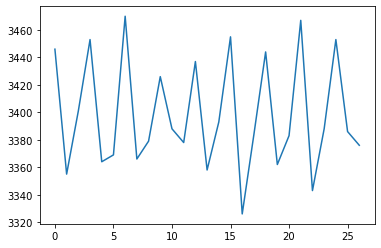

In [17]:
plt.plot(range(27) ,cs)